Feature: 200754_x_at, Information Gain: 0.9353
Feature: 217879_at, Information Gain: 0.9353
Feature: 210616_s_at, Information Gain: 0.9353
Feature: 212718_at, Information Gain: 0.9353
Feature: 209140_x_at, Information Gain: 0.9353
Feature: 209140_x_at.1, Information Gain: 0.9353
Feature: 222607_s_at, Information Gain: 0.9353
Feature: 216526_x_at, Information Gain: 0.9353
Feature: 217913_at, Information Gain: 0.9353
Feature: 1554078_s_at, Information Gain: 0.9353
Feature: 212870_at, Information Gain: 0.9353
Feature: 212239_at, Information Gain: 0.9353
Accuracy: 0.65
15 0 8 0
0.6521739130434783
Predictions: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

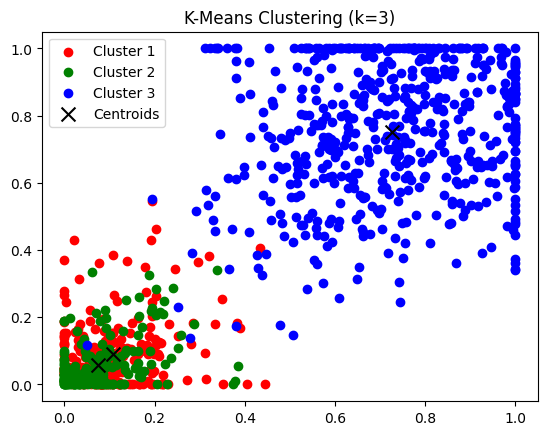

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


#data = pd.read_csv("play_tennis.csv")
data=pd.read_csv("DLBCL-2.csv")
#label_encoder = LabelEncoder()
#for column in data.select_dtypes(include=['object']).columns:
    #data[column] = label_encoder.fit_transform(data[column])
    
#data = data.drop('day',axis=1)
X = data.drop(columns=['target'])
y = data['target']
#data['target'] = data['target'].map({'DLBCL': 0, 'FL': 1})

data.head(15)

def entropy(y):
    value_counts = y.value_counts()
    probabilities = value_counts / len(y)
    entropy_value = -np.sum(probabilities * np.log2(probabilities.replace(0, 1)))
    return entropy_value
entropy(y)

def information_gain(y, feature):

    total_entropy = entropy(y)
    
    unique_values = feature.unique()
    weighted_entropies = 0

    for value in unique_values:
        subset_y = y[feature == value]
        weighted_entropies += (len(subset_y) / len(y)) * entropy(subset_y)

    return total_entropy - weighted_entropies

for column in data.columns:
    if column != 'target':
        feature = data[column]
        ig = information_gain(y, feature)
        print(f"Feature: {column}, Information Gain: {ig:.4f}")

class Node:
    def __init__(self, feature=None, value=None, entropy=None, information_gain=None, left=None, right=None):
        self.feature = feature
        self.value = value
        self.entropy = entropy
        self.information_gain = information_gain
        self.left = left
        self.right = right

def build_decision_tree(X, y):
    if entropy(y) == 0:
        # If all instances have the same class, create a leaf node
        return Node(value=y.iloc[0])

    if X.empty:
        # If no features left, create a leaf node with the majority class
        return Node(value=y.value_counts().idxmax())

    # Find the best feature to split on
    best_feature = None
    max_info_gain = 0

    for feature_name in X.columns:
        current_info_gain = information_gain(y, X[feature_name])
        if current_info_gain > max_info_gain:
            max_info_gain = current_info_gain
            best_feature = feature_name

    # Create a node with the best feature
    node = Node(feature=best_feature, entropy=entropy(y), information_gain=max_info_gain, value={})

    # Recursively build the left and right subtrees
    unique_values = X[best_feature].unique()
    for value in unique_values:
        subset_X = X[X[best_feature] == value].drop(columns=[best_feature])
        subset_y = y[X[best_feature] == value]
        child_node = build_decision_tree(subset_X, subset_y)

        if node.value is None:
            node.value = {value: child_node}
        else:
            node.value[value] = child_node

    return node

decision_tree = build_decision_tree(X, y)


def predict(node, instance):
  if node.feature is None:
    return node.value  # Assuming 'value' holds the final class label here
  else:
    value = instance[node.feature]
    if value in node.value:
      return predict(node.value[value], instance)
    else:
      # Handle unseen feature values (return default class)
      return y_train.value_counts().idxmax()  # Assuming 'y_train' holds the training target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = build_decision_tree(X_train, y_train)
y_pred = [predict(decision_tree, instance) for _, instance in X_test.iterrows()]

accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_score:.2f}")

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print (tp,fp,fn,tn)
acc=(tp+tn)/(tp+tn+fp+fn)
print (acc)


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}

    def fit(self, X, y):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        for c in unique_classes:
            # Calculate class probabilities
            self.class_probs[c] = np.sum(y == c) / num_samples

            # Calculate feature probabilities for each class
            features_given_class = X[y == c]
            self.feature_probs[c] = np.sum(features_given_class, axis=0) / np.sum(y == c)

    def predict(self, X):
        predictions = []

        for sample in X:
            class_scores = {}

            for c, class_prob in self.class_probs.items():
                # Calculate the probability of the sample belonging to each class
                feature_probs_given_class = self.feature_probs[c]
                log_prob = np.sum(np.log(sample * feature_probs_given_class ))
                class_scores[c] = np.log(class_prob) + log_prob

            # Predict the class with the highest probability
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)

        return predictions

data = pd.read_csv("Financial_Coverage-2.csv")
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
#Convert categorical features to numerical values using label encoding

#data=data.drop('Patient Name',axis=1)
X = data.drop('smoker', axis=1).values
y = data['smoker'].values


n_splits = 5
indices = np.arange(len(X))
np.random.shuffle(indices)
fold_indices = np.array_split(indices, n_splits)
for i in range(n_splits):
    test_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Predictions:", predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print(tp)
print(fp)
print(fn)
print(tn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print(accuracy)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(data, k, max_iterations):
  centroids = data[np.random.choice(len(data), k, replace=False)]
  assignments = np.zeros(len(data))
  for _ in range(max_iterations):
    for i, point in enumerate(data):
      distances_to_centroids = [distance(point, centroid) for centroid in centroids]
      assignments[i] = np.argmin(distances_to_centroids)

    for cluster in range(k):
      cluster_data = data[assignments == cluster]
      if len(cluster_data) > 0:  # Avoid division by zero
        centroids[cluster] = np.mean(cluster_data, axis=0)

  return centroids, assignments

data = pd.read_csv("CancerData.csv")
#data=data.drop('smoker',axis=1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

#features = list(data.columns)[:-1]
#X = data[features].to_numpy()
#X = data.iloc[:,1:].values
#X = data.iloc[:, :].values
X = data.drop(columns='Geneid\Class').values

k = 3
max_iterations = 100

centroids, assignments = kmeans(X, k, max_iterations)

clustered_data = []
for i in range(k):
  clustered_data.append(X[assignments == i])

for i in range(k):
  print(f"\nCluster {i+1} data points:")
  print(data.iloc[assignments == i])

colors = ['red', 'green', 'blue'] 
for i in range(k):
  plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i+1}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
#plt.xlabel(features[0])
#plt.ylabel(features[1])
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}

    def fit(self, X, y):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        for c in unique_classes:
            # Calculate class probabilities
            self.class_probs[c] = np.sum(y == c) / num_samples

            # Calculate feature probabilities for each class
            features_given_class = X[y == c]
            self.feature_probs[c] = np.sum(features_given_class, axis=0) / np.sum(y == c)

    def predict(self, X):
        predictions = []

        for sample in X:
            class_scores = {}

            for c, class_prob in self.class_probs.items():
                # Calculate the probability of the sample belonging to each class
                feature_probs_given_class = self.feature_probs[c]
                log_prob = np.sum(np.log(sample * feature_probs_given_class ))
                class_scores[c] = np.log(class_prob) + log_prob

            # Predict the class with the highest probability
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)

        return predictions

data = pd.read_csv("Financial_Coverage-2.csv")
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
#Convert categorical features to numerical values using label encoding

#data=data.drop('Patient Name',axis=1)
X = data.drop('smoker', axis=1).values
y = data['smoker'].values


n_splits = 5
indices = np.arange(len(X))
np.random.shuffle(indices)
fold_indices = np.array_split(indices, n_splits)
for i in range(n_splits):
    test_indices = fold_indices[i]
    train_indices = np.concatenate(fold_indices[:i] + fold_indices[i+1:])

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)





nb_classifier = NaiveBayesClassifier()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Predictions:", predictions)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
print(tp)
print(fp)
print(fn)
print(tn)
accuracy=(tp+tn)/(tp+fp+tn+fn)
print(accuracy)

Predictions: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Accuracy: 0.6816479400749064
166
44
41
16
0.6816479400749064



Cluster 1 data points:
     Geneid\Class  Normal_1  Normal_2  Normal_3  Normal_4  Normal_5  Normal_6  \
5             624  0.621871  0.653232  1.000000  0.907257  0.807012  0.855261   
6             702  0.944888  0.965595  0.922715  0.662796  0.786273  0.774444   
7             623  0.684992  0.975052  0.980551  1.000000  0.787779  0.683060   
10            868  0.707610  0.934524  0.788642  1.000000  0.843843  0.841518   
11            169  0.624758  0.732293  0.877265  0.751033  0.665386  1.000000   
..            ...       ...       ...       ...       ...       ...       ...   
982            73  0.841689  0.691551  0.705000  0.689753  0.804835  0.971395   
986            35  0.864499  0.937368  0.511868  0.770317  0.957559  0.973482   
989           309  0.562963  0.772603  0.639292  0.621099  1.000000  0.451265   
992           491  0.596619  1.000000  0.914233  0.652921  0.559954  0.454971   
997           581  0.857850  0.664722  1.000000  0.427765  0.853170  0.668867   

   

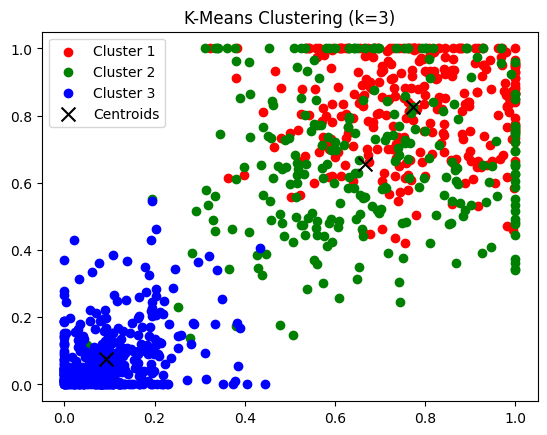

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def distance(point1, point2):
  return np.sqrt(np.sum((point1 - point2) ** 2))

def kmeans(data, k, max_iterations):
  centroids = data[np.random.choice(len(data), k, replace=False)]
  assignments = np.zeros(len(data))
  for _ in range(max_iterations):
    for i, point in enumerate(data):
      distances_to_centroids = [distance(point, centroid) for centroid in centroids]
      assignments[i] = np.argmin(distances_to_centroids)

    for cluster in range(k):
      cluster_data = data[assignments == cluster]
      if len(cluster_data) > 0:  # Avoid division by zero
        centroids[cluster] = np.mean(cluster_data, axis=0)

  return centroids, assignments

data = pd.read_csv("CancerData.csv")
#data=data.drop('smoker',axis=1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

#features = list(data.columns)[:-1]
#X = data[features].to_numpy()
#X = data.iloc[:,1:].values
#X = data.iloc[:, :].values
X = data.drop(columns='Geneid\Class').values

k = 3
max_iterations = 100

centroids, assignments = kmeans(X, k, max_iterations)

clustered_data = []
for i in range(k):
  clustered_data.append(X[assignments == i])

for i in range(k):
  print(f"\nCluster {i+1} data points:")
  print(data.iloc[assignments == i])

colors = ['red', 'green', 'blue'] 
for i in range(k):
  plt.scatter(clustered_data[i][:, 0], clustered_data[i][:, 1], c=colors[i], label=f"Cluster {i+1}")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
#plt.xlabel(features[0])
#plt.ylabel(features[1])
plt.title(f"K-Means Clustering (k={k})")
plt.legend()
plt.show()
